**# Netflix Content-Based Recommender (TF-IDF + Cosine)**

**## 1. Project Overview**

This project analyzes the Netflix Movies and TV Shows dataset to explore release trends, genres, and countries of production. A content-based recommender system is then built using TF-IDF and cosine similarity to suggest similar titles. The system also provides explainable keywords to show why recommendations were made.

**## Dataset**
Source: https://www.kaggle.com/datasets/shivamb/netflix-shows
Format: csv
size: ~9000




**## 2. Setups & Imports**


*   Install/import libraries(pandas, numpy, matplotlib, scikit-learn)
*   Set pandas display options, random seed



In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px

pd.set_option('display.max_colwidth', None)
np.random.seed(42)

# set some visualization style for consistency
sns.set(style = "whitegrid")
print("All libraries imported sucecssfully")



All libraries imported sucecssfully


**## 2. Load Data**

In [63]:
Netflixdata = pd.read_csv("/content/Netflixdata.csv")
Netflixdata

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain."


**## 4. Exploratory Data Analysis (EDA)**

**### a) Data Quality**

In [64]:
print(Netflixdata.shape)
print(Netflixdata.info())
print(Netflixdata.describe())

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [65]:
# Missing values summary
print(Netflixdata.isna().sum().sort_values(ascending= False))

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64


In [66]:
print(Netflixdata['type'].value_counts(normalize=True))
print(Netflixdata['rating'].value_counts())
print(Netflixdata['country'].value_counts())

type
Movie      0.696151
TV Show    0.303849
Name: proportion, dtype: float64
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
country
United States                                                      2818
India                                                               972
United Kingdom                                                      419
Japan                                                               245
South Korea                                                         199
                                                                   ... 
Mexico, United States, Spain, Colombia                                1
Canada, Norway                                                        1
Finland, Germany

In [67]:
# Filtering to see if it's Tv show or Movies for Mexico, United States,
# Spain and Columbia that has value_count = 1
Netflixdata[Netflixdata['country'] == "Mexico, United States, Spain, Colombia"][['type','title']]

,type,title
3212,TV Show,La Reina del Sur


In [68]:
# Seeing the most recent year
Netflixdata['release_year'].sort_values(ascending=False)

,release_year
1,2021
2,2021
3,2021
31,2021
30,2021
...,...
8739,1943
8660,1943
7790,1942
8205,1942


**## b)  Univariate Analysis**


*   Histogram: Netflix Titles Released per Year
*   Bar Chart: Top Genres


*   Bar Chart: Top Countries






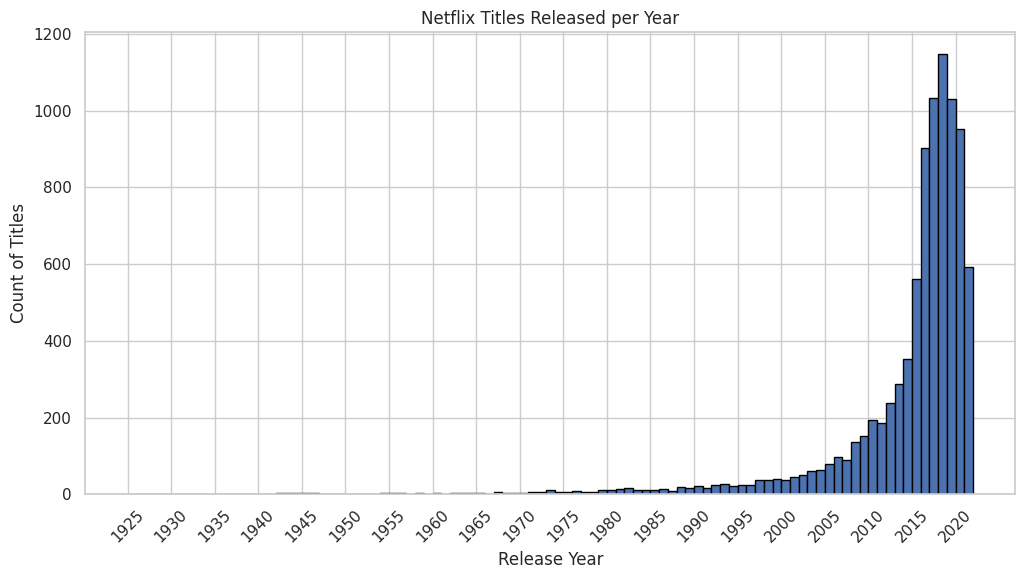

In [69]:

# Create bin edges for each year from min to max
bins = np.arange(Netflixdata['release_year'].min(), Netflixdata['release_year'].max() + 2, 1)

plt.figure(figsize=(12,6))
plt.hist(Netflixdata['release_year'], bins=bins, edgecolor='black')
plt.title("Netflix Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.xticks(np.arange(1925, 2021, 5), rotation=45)  # show ticks every 5 years
plt.show()


In [70]:
# Checking why 2021 doesn't appear in the histogram
Netflixdata[Netflixdata['release_year'] == 2021] [['title','country','release_year']]

,title,country,release_year
1,Blood & Water,South Africa,2021
2,Ganglands,NaN,2021
3,Jailbirds New Orleans,NaN,2021
4,Kota Factory,India,2021
5,Midnight Mass,NaN,2021
...,...,...,...
1468,What Happened to Mr. Cha?,South Korea,2021
1551,Hilda,"United Kingdom, Canada, United States",2021
1696,Polly Pocket,"Canada, United States, Ireland",2021
2920,Love Is Blind,United States,2021


*Note: Although the histogram appears to stop at 2020, the dataset does contain titles from 2021. They are few in number, which is why they are not visible at the chosen bin size.*


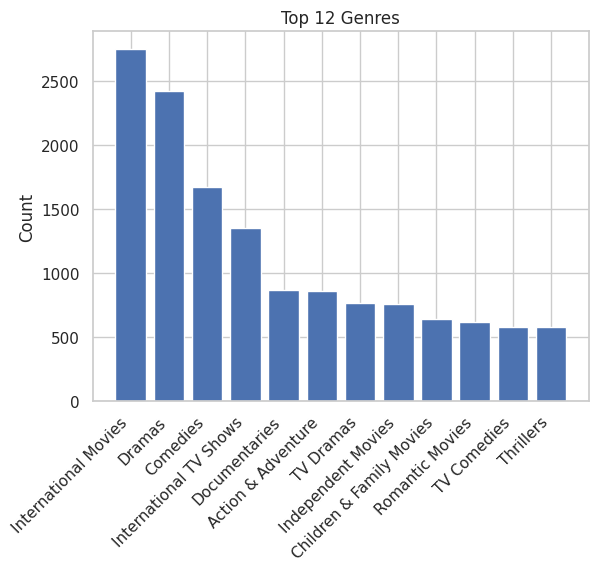

In [71]:
# Top 12 genres
from collections import Counter
genres = (Netflixdata['listed_in']
          .str.split(',')
          .explode()
          .str.strip())
top_genres = Counter(genres).most_common(12)
labels, values = zip(*top_genres)

plt.bar(labels, values)
plt.title("Top 12 Genres")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.show()


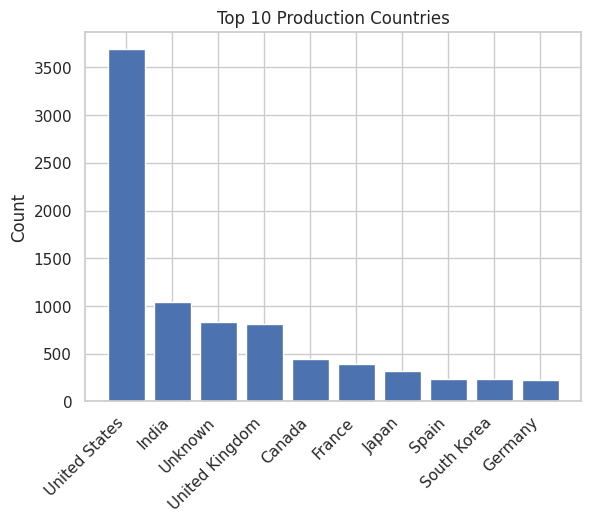

In [72]:
# Top 10 countries
Netflixdata['country'] = Netflixdata['country'].fillna("Unknown") # This permanently changes the dataframe
import numpy as np
Netflixdata['country'] = Netflixdata['country'].replace("Unknown", np.nan) # restoring the unknown entries to NaN

countries = (Netflixdata['country']
             .fillna("Unknown")
             .str.split(',')
             .explode()
             .str.strip())
top_c = countries.value_counts().head(10)
plt.bar(top_c.index, top_c.values)
plt.title("Top 10 Production Countries")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.show()


**## c) Bivariate Analysis**
*   Line chart: Movies vs TV shows over Time

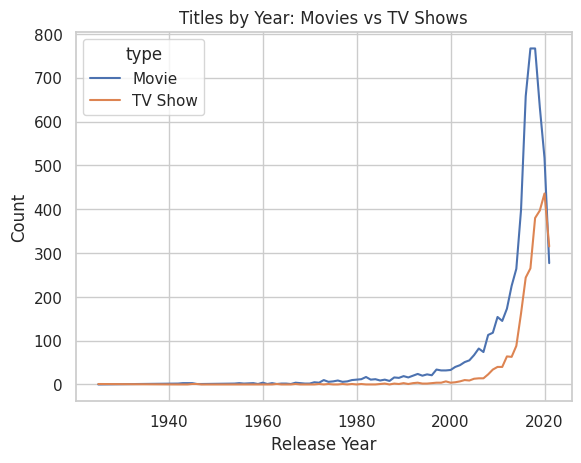

In [73]:
# Movies vs TV Shows over time
import matplotlib.pyplot as plt
pivot = Netflixdata.pivot_table(index='release_year', columns='type', values='show_id', aggfunc='count').fillna(0)
pivot.plot(kind='line')
plt.title("Titles by Year: Movies vs TV Shows")
plt.xlabel("Release Year"); plt.ylabel("Count")
plt.show()


**## 5. Feature engineering: Build Text Column**

Why: Constructing text from title + genre + description, lowercased

In [74]:
# Preserve original for display
Netflixdata['title_display'] = Netflixdata['title']

# Lowercase version only for TF-IDF text
Netflixdata['title_clean'] = Netflixdata['title'].str.lower().str.strip()

# Build text column for recommender
Netflixdata['text'] = (
    Netflixdata['title_clean'] + ' ' +
    Netflixdata['listed_in'].str.lower().fillna(' ') + ' ' +
    Netflixdata['description'].str.lower().fillna(' ')
)


**## 6. Modeling - Feature Extraction(NLP)**
Why: Representing text as numeric vectors


In [75]:
from re import X
# Vectorize with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(Netflixdata['text']) # use new DataFrame column


**## 7. Recommender Function: Find Similar Titles**

In [80]:
from sklearn.metrics.pairwise import cosine_similarity

# Build lookup dictionary: cleaned title -> row index
title_to_idx = {}
for i, t in enumerate(Netflixdata['title_clean']):
    title_to_idx[t] = i

def recommend(user_title, k=10):
    """
    user_title: string title (case-insensitive)
    k: number of similar titles to return
    """
    # Normalize the user's input
    key = str(user_title).lower().strip()

    # Guard: title must exist
    if key not in title_to_idx:
        return f"Title '{user_title}' not found."

    # Jump to the exact row
    idx = title_to_idx[key]

    # Compare that row to all rows (cosine similarity)
    sims = cosine_similarity(X[idx], X).ravel()

    # Rank titles by similarity (best to worst), skip itself
    order = sims.argsort()[::-1]
    top_idx = [j for j in order if j != idx][:k]

    # Return a readable result
    cols = ['title_display','type','listed_in','rating','release_year','description']
    out  = Netflixdata.iloc[top_idx][cols].reset_index(drop=True)
    return out
recommend("Blood & Water", k=5)


,title_display,type,listed_in,rating,release_year,description
0,"Sister, Sister",TV Show,"TV Comedies, Teen TV Shows",TV-PG,1998,"Separated at birth, twin sisters Tia Landry and Tamera Campbell reunite after 14 years and soon move in together, blending families and personalities."
1,Gossip Girl,TV Show,"TV Dramas, Teen TV Shows",TV-14,2012,A group of hyperprivileged Manhattan private-school kids seem to get away with everything. Except an anonymous blogger is watching their every move.
2,Lion Pride,TV Show,"International TV Shows, Romantic TV Shows, TV Comedies",TV-MA,2017,"After crossing paths at a crime scene, a renowned math teacher and an antiques appraiser embark on an unexpected journey of love and self-discovery."
3,Clickbait,TV Show,"Crime TV Shows, TV Dramas, TV Mysteries",TV-MA,2021,"When family man Nick Brewer is abducted in a crime with a sinister online twist, those closest to him race to uncover who is behind it and why."
4,Accidentally in Love,TV Show,"International TV Shows, Romantic TV Shows, TV Comedies",TV-14,2018,"Rejecting the demands of her wealthy family, a young woman poses as an ordinary college student and crosses paths with a stoic pop star at school."


In [81]:
Netflixdata[Netflixdata['title_display'] == "Blood & Water"] [['type','release_year']]

,type,release_year
1,TV Show,2021


***Sanity Check***

*When querying *Blood & Water* (a TV Show), the recommender system returned only other TV Shows.*  

*Even without an explicit filter, this makes sense because the model relies on text similarity (description + genres), and TV Shows tend to share more descriptive patterns with each other than with Movies.*

*This confirms the recommender is capturing meaningful content-based similarities.*


**### 8. Unified Recommender Function (Movies, TV Shows, or Mixed)**

In [82]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def recommend(user_title, k=10, type_filter=None):
    key = str(user_title).lower().strip()
    if key not in title_to_idx:
        return f"Title '{user_title}' not found."
    idx = title_to_idx[key]

    # choose candidate indices
    if type_filter in ("Movie", "TV Show"):
        candidates = np.where(Netflixdata['type'].values == type_filter)[0]
    else:
        candidates = np.arange(len(Netflixdata))

    # compute similarities only against candidates
    sims = cosine_similarity(X[idx], X[candidates]).ravel()
    order = sims.argsort()[::-1]

    # map back to original indices, skip itself, take top-k
    ranked = candidates[order]
    ranked = [j for j in ranked if j != idx][:k]

    cols = ['title_display','type','listed_in','rating','release_year','description']
    return Netflixdata.iloc[ranked][cols].reset_index(drop=True)


In [83]:
# Any type (default behavior)
recommend("Blood & Water", k=5)

# Movies only
recommend("Blood & Water", k=5, type_filter="Movie") # for similar movies only

# TV shows only
recommend("Blood & Water", k=5, type_filter="TV Show") # for similar tv shows only

#


,title_display,type,listed_in,rating,release_year,description
0,"Sister, Sister",TV Show,"TV Comedies, Teen TV Shows",TV-PG,1998,"Separated at birth, twin sisters Tia Landry and Tamera Campbell reunite after 14 years and soon move in together, blending families and personalities."
1,Gossip Girl,TV Show,"TV Dramas, Teen TV Shows",TV-14,2012,A group of hyperprivileged Manhattan private-school kids seem to get away with everything. Except an anonymous blogger is watching their every move.
2,Lion Pride,TV Show,"International TV Shows, Romantic TV Shows, TV Comedies",TV-MA,2017,"After crossing paths at a crime scene, a renowned math teacher and an antiques appraiser embark on an unexpected journey of love and self-discovery."
3,Clickbait,TV Show,"Crime TV Shows, TV Dramas, TV Mysteries",TV-MA,2021,"When family man Nick Brewer is abducted in a crime with a sinister online twist, those closest to him race to uncover who is behind it and why."
4,Accidentally in Love,TV Show,"International TV Shows, Romantic TV Shows, TV Comedies",TV-14,2018,"Rejecting the demands of her wealthy family, a young woman poses as an ordinary college student and crosses paths with a stoic pop star at school."


In [84]:
def recommend_mixed(user_title, total=10):
    half = total // 2
    a = recommend(user_title, k=half, type_filter="Movie")
    b = recommend(user_title, k=total - half, type_filter="TV Show")
    # simple vertical stack (will be a DataFrame if both are DFs; handle “not found” strings if needed)
    return pd.concat([a, b], ignore_index=True)

recommend_mixed("Blood & Water",total=10)

,title_display,type,listed_in,rating,release_year,description
0,Lady in the Water,Movie,"Sci-Fi & Fantasy, Thrillers",PG-13,2006,"When an apartment building manager discovers a water nymph in the complex's swimming pool, he tries to help her return to her mythical home."
1,Lilli,Movie,"Dramas, Independent Movies, International Movies",TV-MA,2018,"A woman who's about to give birth finds her maternal instincts kicking in when she's abducted, imprisoned and brutalized by a vicious gang."
2,Next Enti?,Movie,"Comedies, Dramas, International Movies",TV-14,2018,"Clashing views on intimacy lead a couple to go their separate ways to reflect on commitment and companionship, before suddenly crossing paths again."
3,Voiceless,Movie,"Dramas, International Movies, Thrillers",TV-MA,2020,"A bright and promising young girl gets abducted and taken to a terrorist camp, where she unexpectedly crosses paths with her soulmate."
4,Walk Away from Love,Movie,"Dramas, Romantic Movies",TV-14,2017,"Heartbroken from her last relationship, an attorney is wary of falling in love again. But crossing paths with an ex upends her plans to finally move on."
5,"Sister, Sister",TV Show,"TV Comedies, Teen TV Shows",TV-PG,1998,"Separated at birth, twin sisters Tia Landry and Tamera Campbell reunite after 14 years and soon move in together, blending families and personalities."
6,Gossip Girl,TV Show,"TV Dramas, Teen TV Shows",TV-14,2012,A group of hyperprivileged Manhattan private-school kids seem to get away with everything. Except an anonymous blogger is watching their every move.
7,Lion Pride,TV Show,"International TV Shows, Romantic TV Shows, TV Comedies",TV-MA,2017,"After crossing paths at a crime scene, a renowned math teacher and an antiques appraiser embark on an unexpected journey of love and self-discovery."
8,Clickbait,TV Show,"Crime TV Shows, TV Dramas, TV Mysteries",TV-MA,2021,"When family man Nick Brewer is abducted in a crime with a sinister online twist, those closest to him race to uncover who is behind it and why."
9,Accidentally in Love,TV Show,"International TV Shows, Romantic TV Shows, TV Comedies",TV-14,2018,"Rejecting the demands of her wealthy family, a young woman poses as an ordinary college student and crosses paths with a stoic pop star at school."


**## 9. Advanced Visualization - Dimensionality Reduction**

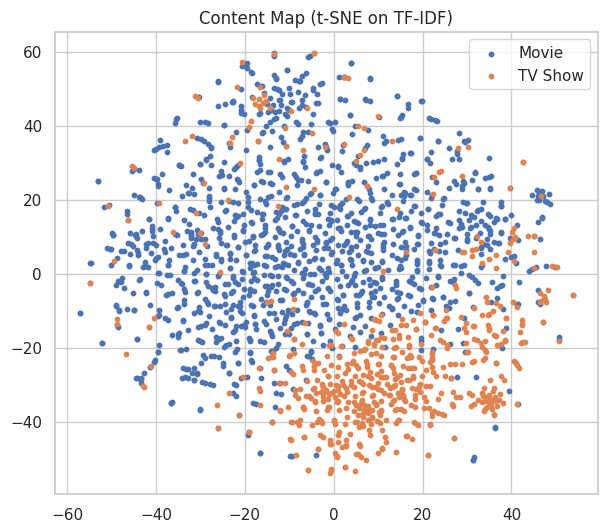

In [85]:
# 2D map of the Netflix catalog
from sklearn.manifold import TSNE
import numpy as np

# sample to ~2000 to keep it fast
idx_sample = np.random.RandomState(42).choice(len(Netflixdata), size=min(2000, len(Netflixdata)), replace=False)
X_small = X[idx_sample]
types_small = Netflixdata.iloc[idx_sample]['type'].values

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
XY = tsne.fit_transform(X_small.toarray())  # may take ~10–30s

plt.figure(figsize=(7,6))
for t in ['Movie','TV Show']:
    m = types_small == t
    plt.scatter(XY[m,0], XY[m,1], s=10, label=t)
plt.title("Content Map (t-SNE on TF-IDF)")
plt.legend()
plt.show()


**## 10. Inside the Mind of the Recommender**

In [86]:
# How this recommender system works?
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#1) Preserve title for display; make a normalized copy
Netflixdata['title_display'] = Netflixdata['title']
Netflixdata['title_clean']   = Netflixdata['title'].str.lower().str.strip()

#2) Normalize/denoise genres and enrich with human phrases
def normalize_genres(g):
    if not isinstance(g, str): return ""
    g = g.lower()

    # collapse noisy "tv ..." labels to base genres
    g = (g.replace("tv dramas", "dramas")
           .replace("tv comedies", "comedies")
           .replace("tv mysteries", "mysteries")
           .replace("crime tv shows", "crime")
           .replace("international tv shows", "international"))

    # derive a compact tag set we care about
    tags = []
    if "teen tv shows" in g:  tags.append("teen")
    for key in ["dramas","comedies","mysteries","crime","romantic","documentaries",
                "action & adventure","children & family movies","independent movies",
                "international","horror","sci-fi & fantasy","thrillers","anime"]:
        if key in g: tags.append(key.replace(" & ", "_").replace(" ", "_"))

    # add compound tags for interpretability
    if "teen" in tags and "dramas" in g:     tags.append("teen_drama")
    if "teen" in tags and "mysteries" in g:  tags.append("teen_mystery")
    if "teen" in tags and "crime" in g:      tags.append("teen_crime")

    return " ".join(sorted(set(tags)))

#3) Phrase-aware description cleaning
def clean_desc(d):
    if not isinstance(d, str): return ""
    d = d.lower()
    # keep natural phrases (ts-idf bigrams will also capture these)
    d = d.replace("high school", "high_school")
    d = d.replace("private school", "private_school")
    d = re.sub(r"\bcoming of age\b", "coming_of_age", d)
    return d

genres_norm = Netflixdata['listed_in'].apply(normalize_genres)
desc_clean  = Netflixdata['description'].apply(clean_desc)

# Build final text: title words + normalized genres + cleaned description
Netflixdata['text'] = (
    Netflixdata['title_clean'] + " " +
    genres_norm + " " +
    desc_clean
)

# 4) TF-IDF with unigrams+bigrams (captures phrases)
# Custom stopwords to hide generic streaming terms in explanations
custom_stop = ['english','tv','show','shows','series','season','episode','film','movie','movies']

tfidf = TfidfVectorizer(
    stop_words=custom_stop,    # list (valid)
    ngram_range=(1, 2),        # unigrams + bigrams → "high_school", "teen drama"
    min_df=2,                  # drop ultra-rare noise
    max_features=25000,
    sublinear_tf=True
)
X = tfidf.fit_transform(Netflixdata['text'])
feature_names = np.array(tfidf.get_feature_names_out())

# 5) Title - index lookup
title_to_idx = {}
for i, t in enumerate(Netflixdata['title_clean']):
    title_to_idx[t] = i

print("Ready. TF-IDF shape:", X.shape, "| vocab size:", len(feature_names))


Ready. TF-IDF shape: (8807, 25000) | vocab size: 25000


In [90]:
# Return top keywords for the query and its top-k neighbors
def _top_terms_for_row(row_vec, n=12):
    arr = row_vec.toarray().ravel()
    idx = arr.argsort()[::-1][:n]
    return feature_names[idx].tolist()

def keywords_for_query_and_recs(user_title, k=5, n_terms=12):
    key = str(user_title).lower().strip()
    if key not in title_to_idx:
        return f"Title '{user_title}' not found."

    i = title_to_idx[key]
    sims = cosine_similarity(X[i], X).ravel()
    order = sims.argsort()[::-1]
    recs = [j for j in order if j != i][:k]

    rows = []
    rows.append({
        "title": f"[Query] {Netflixdata.iloc[i]['title_display']}",
        "type":  Netflixdata.iloc[i]['type'],
        "keywords": ", ".join(_top_terms_for_row(X[i], n_terms))
    })
    for j in recs:
        rows.append({
            "title": Netflixdata.iloc[j]['title_display'],
            "type":  Netflixdata.iloc[j]['type'],
            "keywords": ", ".join(_top_terms_for_row(X[j], n_terms))
        })
    return pd.DataFrame(rows)
keywords_for_query_and_recs("Blood & Water", k=5, n_terms=12)


,title,type,keywords
0,[Query] Blood & Water,TV Show,"paths at, private school, cape town, water dramas, cape, star is, crossing paths, is her, swimming, at party, mysteries after, crossing"
1,Mom,Movie,"is sexually, furious, sexually assaulted, perpetrators, at party, assaulted, the four, destroy the, sexually, to destroy, destroy, after her"
2,Lion Pride,TV Show,"paths at, math teacher, antiques, crossing paths, crime scene, pride, teacher and, and self, crossing, math, lion, self discovery"
3,More to Say,TV Show,"innocence when, prove her, consultant, his murder, her innocence, mysteries after, to say, more to, dies in, legal, say, innocence"
4,"Sister, Sister",TV Show,"sister, separated at, blending, twin sisters, move in, comedies teen, at birth, personalities, 14, families and, separated, and soon"
5,"Hail, Caesar!",Movie,"major star, the actor, hail, kidnapped from, star is, overwhelmed, actor and, is kidnapped, studio, and save, find the, kidnapped"
